In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
comp = pd.read_csv("C:/Users/manth/Assignment/Multi linear/Computer_Data.csv")

comp.drop(["Index"],inplace=True,axis = 1)
comp.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [3]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 10 columns):
price      6259 non-null int64
speed      6259 non-null int64
hd         6259 non-null int64
ram        6259 non-null int64
screen     6259 non-null int64
cd         6259 non-null object
multi      6259 non-null object
premium    6259 non-null object
ads        6259 non-null int64
trend      6259 non-null int64
dtypes: int64(7), object(3)
memory usage: 489.1+ KB


In [4]:
comp.isnull().sum()

price      0
speed      0
hd         0
ram        0
screen     0
cd         0
multi      0
premium    0
ads        0
trend      0
dtype: int64

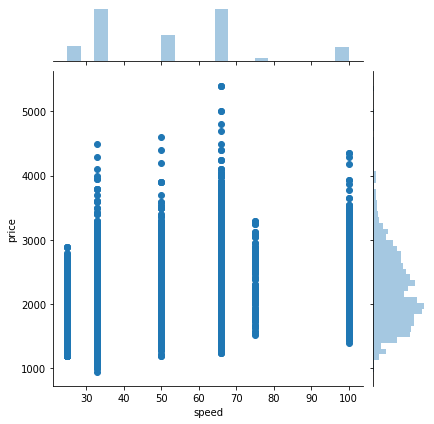

In [5]:
import seaborn as sns
sns.jointplot(data = comp, x = 'speed', y='price')
plt.show()

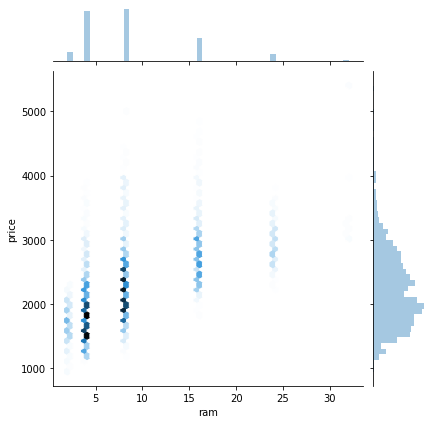

In [6]:
sns.jointplot(x = 'ram', y='price', kind='hex',data=comp)
plt.show()

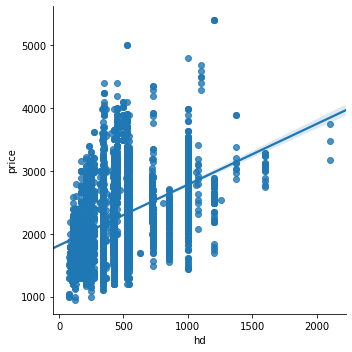

In [7]:
sns.lmplot(x = 'hd', y='price',data=comp)
plt.show()

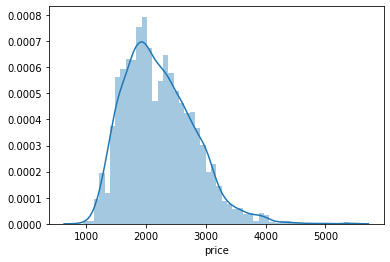

In [8]:
sns.distplot(comp['price'])
plt.show()

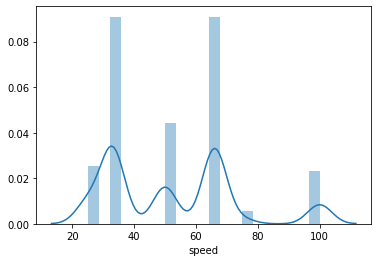

In [9]:
sns.distplot(comp['speed'])
plt.show()

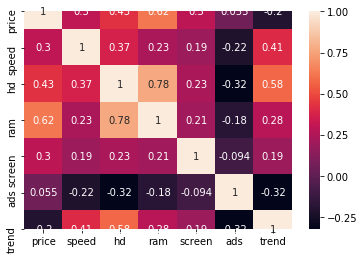

In [10]:
sns.heatmap(comp.corr(),annot=True)
plt.show()

In [11]:
comp.corr()

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


In [12]:
comp_dummies = pd.get_dummies(comp,columns=['cd','multi','premium'])
comp_dummies.head(10)

,price,speed,hd,ram,screen,ads,trend,cd_no,cd_yes,multi_no,multi_yes,premium_no,premium_yes
0,1499,25,80,4,14,94,1,1,0,1,0,0,1
1,1795,33,85,2,14,94,1,1,0,1,0,0,1
2,1595,25,170,4,15,94,1,1,0,1,0,0,1
3,1849,25,170,8,14,94,1,1,0,1,0,1,0
4,3295,33,340,16,14,94,1,1,0,1,0,0,1
5,3695,66,340,16,14,94,1,1,0,1,0,0,1
6,1720,25,170,4,14,94,1,0,1,1,0,0,1
7,1995,50,85,2,14,94,1,1,0,1,0,0,1
8,2225,50,210,8,14,94,1,1,0,1,0,0,1
9,2575,50,210,4,15,94,1,1,0,1,0,0,1


In [13]:
import statsmodels.formula.api as smf

ml1 = smf.ols('price~speed+hd+ram+screen+cd+multi+premium+ads+trend', data=comp).fit()  # regression model
ml1.params

Intercept         307.987985
cd[T.yes]          60.916708
multi[T.yes]      104.323819
premium[T.yes]   -509.224732
speed               9.320281
hd                  0.781780
ram                48.255959
screen            123.089042
ads                 0.657291
trend             -51.849581
dtype: float64

In [14]:
ml1_pred = ml1.predict(comp)
ml1_error = ml1_pred-comp.price
print(np.sqrt(np.mean(ml1_error*ml1_error)),"RMSE value of ML1")

275.1298188638717 RMSE value of ML1


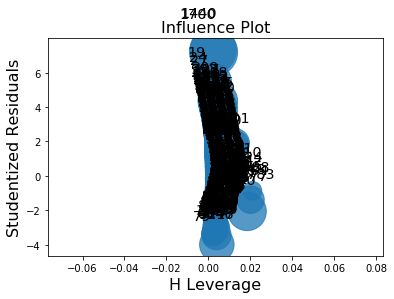

In [15]:
import statsmodels.api as sm
sm.graphics.influence_plot(ml1)
plt.show()

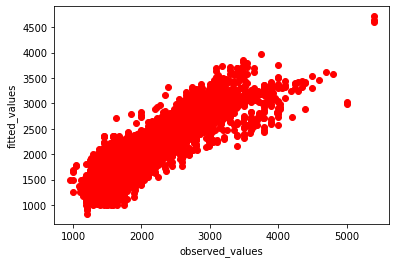

In [16]:
# Observed values VS Fitted values
plt.scatter(comp_dummies.price,ml1_pred,c="r");plt.xlabel("observed_values");plt.ylabel("fitted_values")
plt.show()

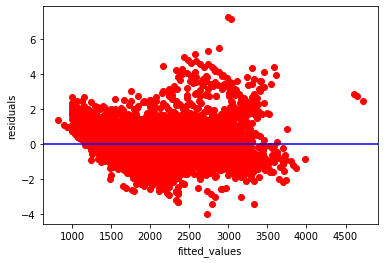

In [17]:
# Residuals VS Fitted Values 
plt.scatter(ml1_pred,ml1.resid_pearson,c="r"),plt.axhline(y=0,color='blue');plt.xlabel("fitted_values");plt.ylabel("residuals")
plt.show()

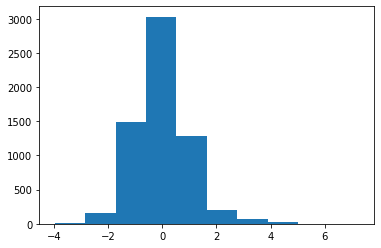

In [18]:
# histogram
plt.hist(ml1.resid_pearson) # Checking the standardized residuals are normally distributed
plt.show()

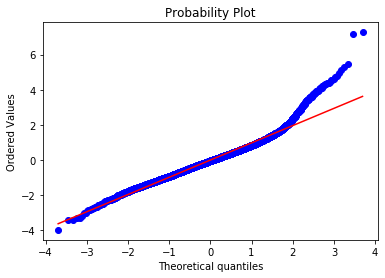

In [19]:
# QQ plot for residuals 
import pylab          
import scipy.stats as st

# Checking Residuals are normally distributed
st.probplot(ml1.resid_pearson, dist="norm", plot=pylab)
plt.show()

In [20]:
### Splitting the data into train and test data 

from sklearn.model_selection import train_test_split
comp_train,comp_test  = train_test_split(comp,test_size = 0.2) # 20% size

In [21]:
# preparing the model on train data 

model_train = smf.ols("price~speed+hd+ram+screen+cd+multi+premium+ads+trend",data=comp_train).fit()

# train_data prediction
train_pred = model_train.predict(comp_train)

# train residual values 
train_resid  = train_pred - comp_train.price

# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid*train_resid))
print(train_rmse)

274.85392906931224


In [22]:
# prediction on test data set 
test_pred = model_train.predict(comp_test)

# test residual values 
test_resid  = test_pred - comp_test.price

# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid*test_resid))
print(test_rmse)

276.34577374918047
